### Boxplot diagram

#### 1. Data Preprocessing - Adatok feldolgozása

In [219]:
# könyvtárak betöltése

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

C:\Users\erika\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\erika\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#df = pd.read_excel("HDI_osszes_BMI_mean.xlsx")
df = pd.read_excel("HDI_jo.xlsx")

In [3]:
df.head()

,County,HDI,HDI_modified,HDI_weighted,BMI_mean
0,Vas,0.930258,0.828275,0.863043,28.58
1,Szabolcs-Szatmár-Bereg,0.811876,0.576437,0.597672,30.41
2,Zala,0.820084,0.774539,0.783497,30.50
3,Veszprém,0.868295,0.751246,0.786627,31.66
4,Csongrád-Csanád,0.880785,0.750642,0.775335,21.69


In [6]:
df.value_counts()

County                  HDI       HDI_modified  HDI_weighted  BMI_mean
Baranya                 0.870056  0.534138      0.587962      26.93       1
Borsod-Abaúj-Zemplén    0.832700  0.571982      0.637282      21.89       1
Zala                    0.820084  0.774539      0.783497      30.50       1
Veszprém                0.868295  0.751246      0.786627      31.66       1
Vas                     0.930258  0.828275      0.863043      28.58       1
Tolna                   0.780350  0.623657      0.655167      29.35       1
Szabolcs-Szatmár-Bereg  0.811876  0.576437      0.597672      30.41       1
Somogy                  0.861109  0.623468      0.657346      22.46       1
Pest                    0.836183  0.778294      0.803563      29.86       1
Nógrád                  0.813489  0.501370      0.566693      36.67       1
Komárom-Esztergom       0.750000  0.670000      0.710000      32.04       1
Jász-Nagykun-Szolnok    0.849277  0.608575      0.661440      27.95       1
Heves            

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   County        20 non-null     object 
 1   HDI           20 non-null     float64
 2   HDI_modified  20 non-null     float64
 3   HDI_weighted  20 non-null     float64
 4   BMI_mean      20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 928.0+ bytes


Az adatkészlet 5 numerikus változóból áll (float64). Nincs hiányzó érték (9568 nem nulla) az összes változóban, és az adattípus ( dtypes ) egy lebegőpontos szám.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HDI,20.0,0.843003,0.042869,0.750000,0.816644,0.835814,0.870145,0.930258
HDI_modified,20.0,0.690762,0.106249,0.501370,0.619745,0.680196,0.763135,0.888488
HDI_weighted,20.0,0.723235,0.094444,0.566693,0.656801,0.716002,0.784280,0.879828
BMI_mean,20.0,27.724000,3.895631,21.690000,24.567500,28.130000,30.050000,36.670000


### Hiányzó adatok kezelése

In [9]:
df.isna().sum()

County          0
HDI             0
HDI_modified    0
HDI_weighted    0
BMI_mean        0
dtype: int64

Az adathalmazunkban nem azonosítottunk hiányzó értékeket

### Exploratory Data Analysis

#### Outlier-ek azonosítása

Boxplot alkalmazása az öt változóra

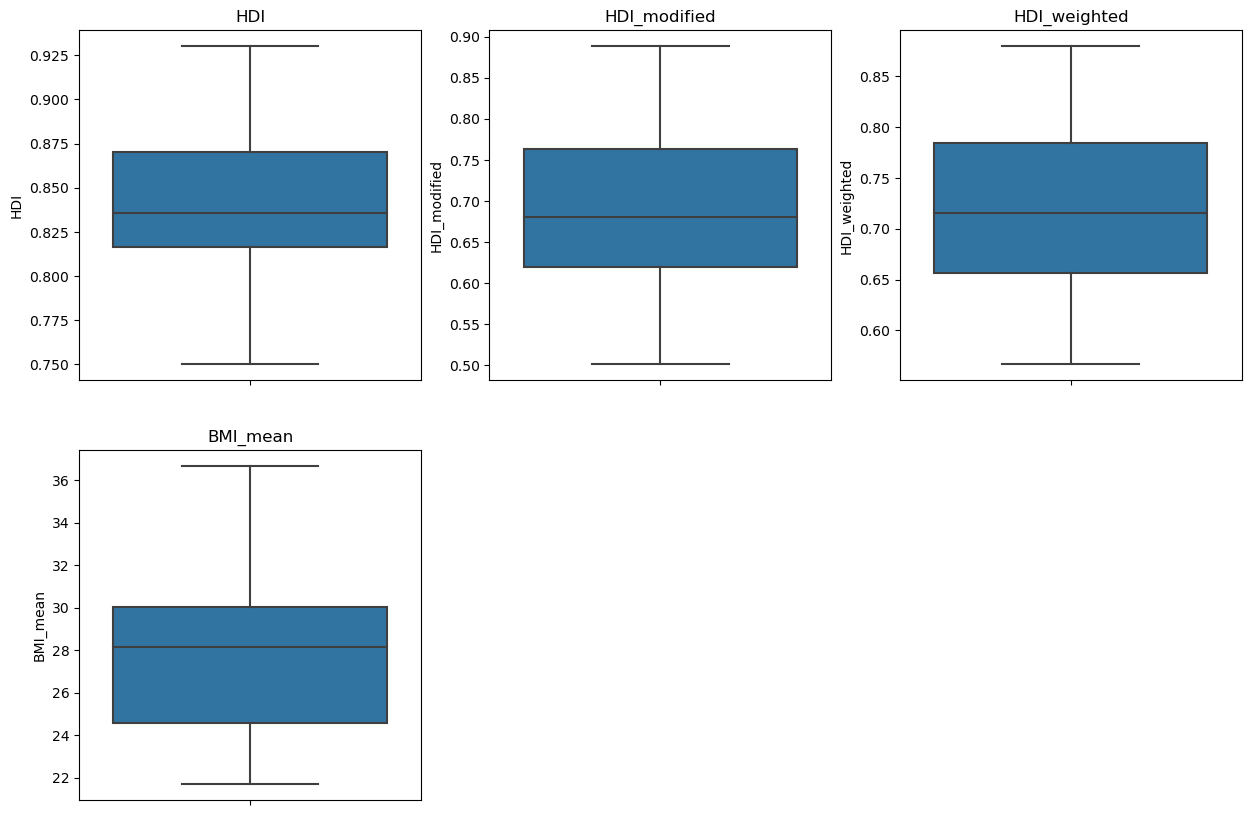

In [9]:
# Kiválasztott oszlopok (5 numerikus oszlop)
columns_to_plot = df.select_dtypes(include=['float64', 'int64']).columns[:5]

# Ábra létrehozása két sorral és három oszloppal (2x3 elrendezés)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2 sor, 3 oszlop

# Minden oszlopot külön boxplot-on jelenítünk meg
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, y=col, ax=axes[i // 3, i % 3])  # A tengelyek megfelelő kiosztása
    axes[i // 3, i % 3].set_title(col)  # Az oszlopnevek címe

# Üres tengelyek kikapcsolása, ha maradtak
for j in range(len(columns_to_plot), 6):  # 6 a tengelyek száma (2 sor * 3 oszlop)
    fig.delaxes(axes[j // 3, j % 3])

Az ábra alapján nem azonosítottunk kiugró értékekeket.

#### Változók korreláltsága-Független változók viszonya

In [10]:
df.corr()

,HDI,HDI_modified,HDI_weighted,BMI_mean
HDI,1.000000,0.570823,0.586736,-0.141157
HDI_modified,0.570823,1.000000,0.992312,-0.051919
HDI_weighted,0.586736,0.992312,1.000000,-0.034089
BMI_mean,-0.141157,-0.051919,-0.034089,1.000000


<AxesSubplot:>

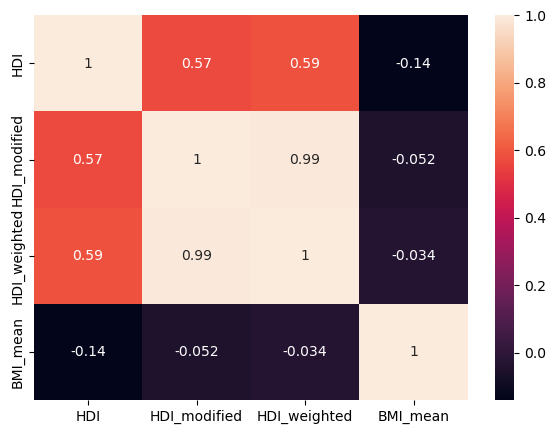

In [11]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

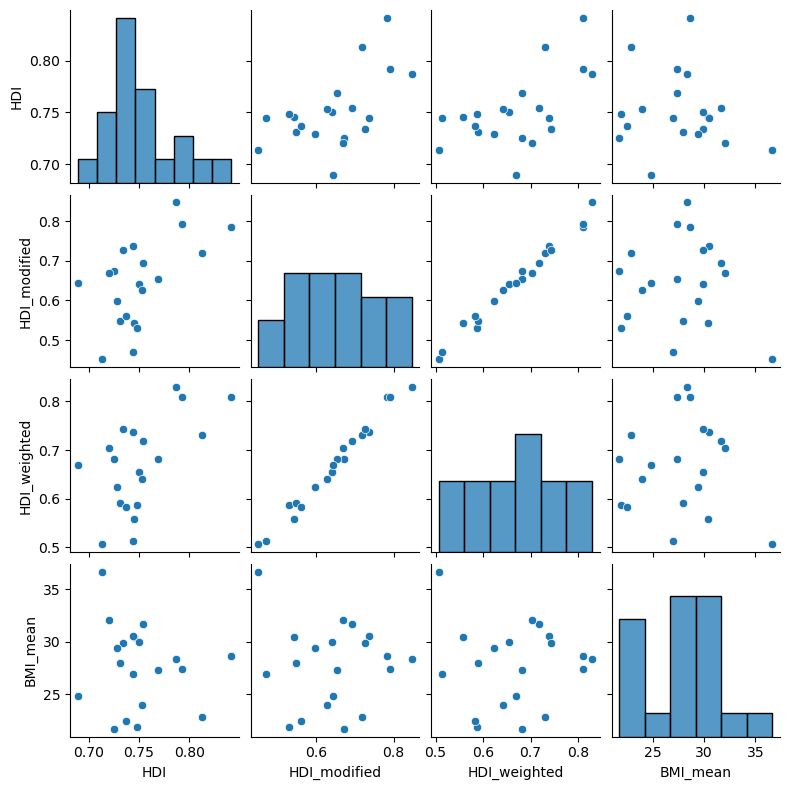

In [12]:
#páronkénti kolleráció
sns.pairplot(df, height=2)
plt.show()